In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# load dataset
df = pd.read_csv('/Users/madhumithaganji/Desktop/Loan_Prediction.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
# checking for missing values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

/var/folders/df/j6vmwc2x15zcnhjldjcpv62m0000gn/T/ipykernel_4369/1918238433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Risk_Flag"], palette="Set2")


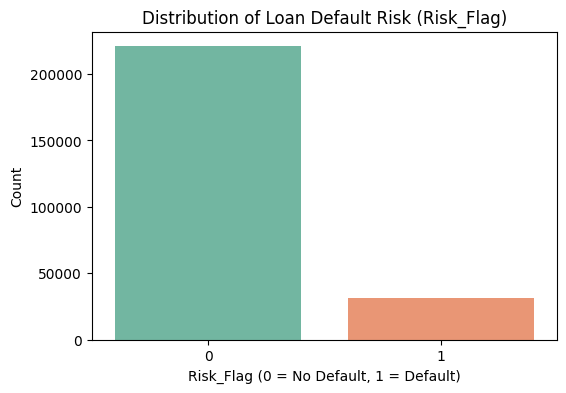

In [7]:
# Visualizing target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Risk_Flag"], palette="Set2")
plt.title("Distribution of Loan Default Risk (Risk_Flag)")
plt.xlabel("Risk_Flag (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

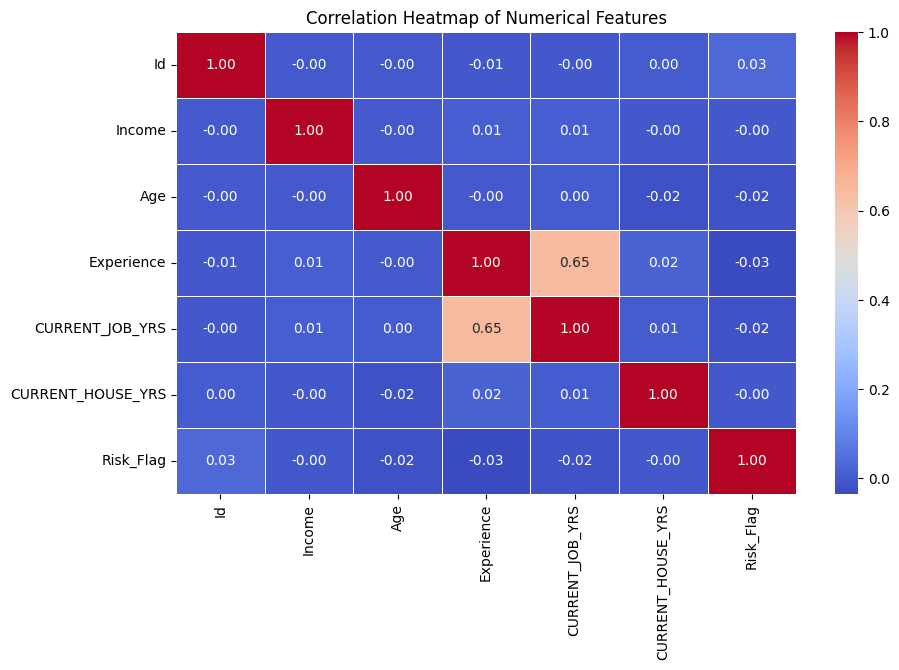

In [8]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

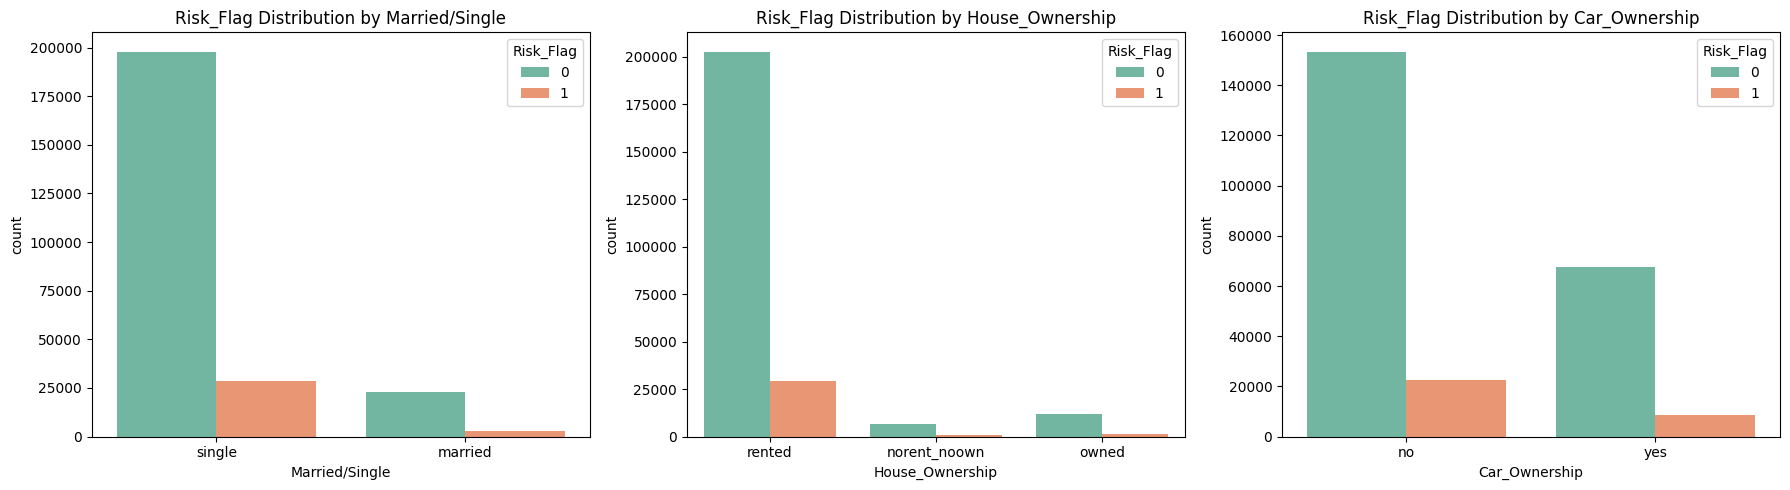

In [9]:
# Distribution of categorical variables
categorical_cols = ["Married/Single", "House_Ownership", "Car_Ownership"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Risk_Flag", data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Risk_Flag Distribution by {col}")
plt.tight_layout()
plt.show()

/var/folders/df/j6vmwc2x15zcnhjldjcpv62m0000gn/T/ipykernel_4369/80321954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_professions.index, y=top_professions.values, palette="viridis")


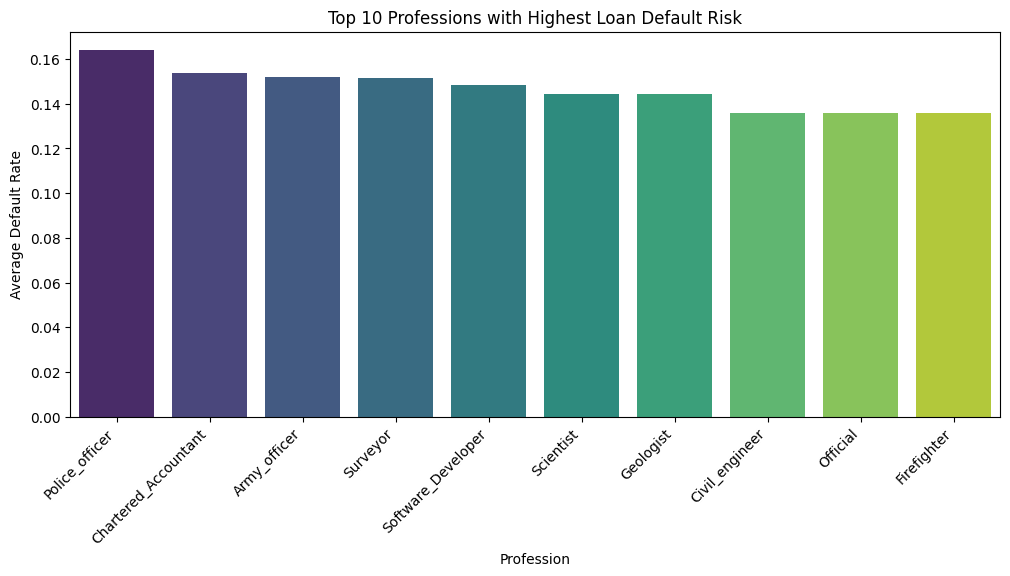

In [10]:
# Top 10 professions with highest loan default risk
top_professions = df.groupby("Profession")["Risk_Flag"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_professions.index, y=top_professions.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Professions with Highest Loan Default Risk")
plt.ylabel("Average Default Rate")
plt.show()


In [11]:
# Drop ID column as it's not useful for prediction
df.drop(columns=["Id"], inplace=True)


In [12]:
# Encoding categorical variables
label_enc_cols = ["Married/Single", "Car_Ownership"]
onehot_enc_cols = ["House_Ownership", "Profession", "CITY", "STATE"]

In [13]:
# Label Encoding
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# Check existing columns
existing_onehot_cols = [col for col in onehot_enc_cols if col in df.columns]

# One-Hot Encoding only on existing columns
df = pd.get_dummies(df, columns=existing_onehot_cols, drop_first=True)

# Verify the transformed dataset
df.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_owned,House_Ownership_rented,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,1,0,3,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,1,0,9,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,0,0,4,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,1,1,2,12,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,1,0,3,14,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [15]:
# Splitting features and target
X = df.drop(columns=["Risk_Flag"])
y = df["Risk_Flag"]


In [16]:
# Feature Selection using F-score
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
# Output selected features
print("Selected Features:", list(selected_features))

Selected Features: ['Age', 'Experience', 'Married/Single', 'Car_Ownership', 'House_Ownership_owned', 'House_Ownership_rented', 'CITY_Bhubaneswar', 'CITY_Gwalior', 'CITY_Kochi', 'STATE_Madhya_Pradesh']


In [19]:
# Customer segmentation using K means clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

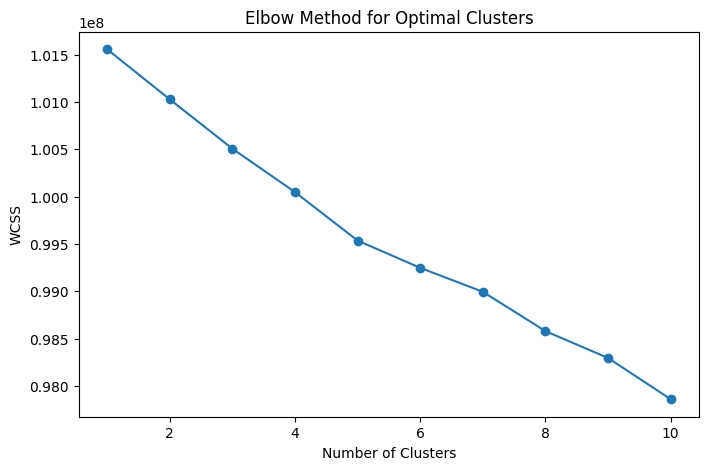

In [20]:
# Choosing optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [21]:
# Applying K-Means with optimal clusters (assuming 4 clusters based on Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\nCustomer Segmentation Clusters Assigned:\n", df['Cluster'].value_counts())


Customer Segmentation Clusters Assigned:
 1    184676
3     38530
2     17386
0     11408
Name: Cluster, dtype: int64


In [ ]:
# Evaluate Clustering using Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score for Clustering:", silhouette_avg)

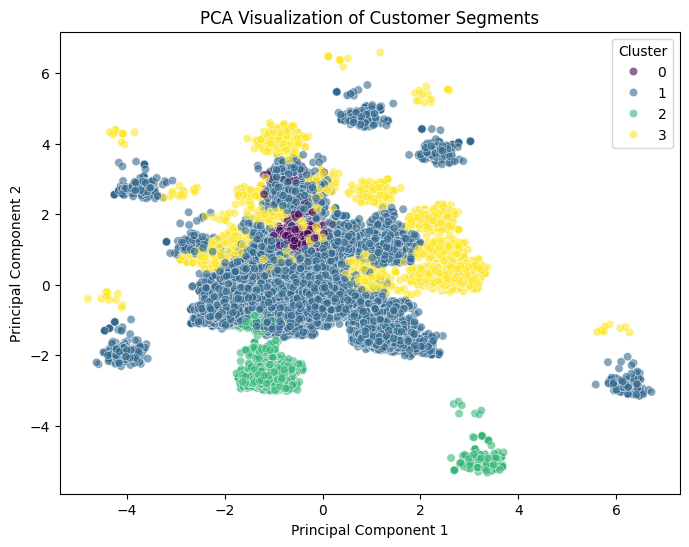

In [22]:
# PCA Visualization of Clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.title("PCA Visualization of Customer Segments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [23]:
# Risk Assessment - Identifying Key Risk Factors
from scipy.stats import chi2_contingency
chi2_results = {}
for col in X.columns:
    contingency_table = pd.crosstab(df[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = p


In [24]:
# Sorting features based on significance
significant_features = sorted(chi2_results, key=chi2_results.get)[:10]
print("\nTop 10 Features Contributing to Loan Default Risk:")
for feature in significant_features:
    print(feature, "- p-value:", chi2_results[feature])


Top 10 Features Contributing to Loan Default Risk:
Income - p-value: 0.0
Experience - p-value: 4.312351857083535e-181
Age - p-value: 2.8653176318386906e-126
CURRENT_JOB_YRS - p-value: 4.931967171585012e-109
CITY_Bhubaneswar - p-value: 3.593982410744039e-52
House_Ownership_rented - p-value: 9.609245681912304e-41
CITY_Kochi - p-value: 2.11258103466159e-34
Car_Ownership - p-value: 1.7350853850183746e-33
House_Ownership_owned - p-value: 4.7999490921821086e-32
STATE_Madhya_Pradesh - p-value: 1.8377583229045772e-31


In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
auc_logistic = roc_auc_score(y_test, y_prob_logistic)
print("AUC Score:", auc_logistic)



Logistic Regression Model Performance:
Accuracy: 0.8770039682539682
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44201
           1       0.00      0.00      0.00      6199

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400

AUC Score: 0.5503467950976519


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_

In [26]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
auc_rf = roc_auc_score(y_test, y_prob_rf)
print("AUC Score:", auc_rf)


Random Forest Model Performance:
Accuracy: 0.8778769841269841
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     44201
           1       0.51      0.14      0.22      6199

    accuracy                           0.88     50400
   macro avg       0.70      0.56      0.58     50400
weighted avg       0.84      0.88      0.85     50400

AUC Score: 0.8094179342100347


In [27]:
# K-Nearest Neighbors Model
import sklearn.neighbors as neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
print("\nKNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
auc_knn = roc_auc_score(y_test, y_prob_knn)
print("AUC Score:", auc_knn)



KNN Model Performance:
Accuracy: 0.8656746031746032
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     44201
           1       0.40      0.19      0.26      6199

    accuracy                           0.87     50400
   macro avg       0.65      0.57      0.59     50400
weighted avg       0.83      0.87      0.84     50400

AUC Score: 0.7224284849104331


In [28]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
print("\nDecision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("AUC Score:", auc_dt)



Decision Tree Model Performance:
Accuracy: 0.8779761904761905
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     44201
           1       0.52      0.13      0.21      6199

    accuracy                           0.88     50400
   macro avg       0.70      0.56      0.57     50400
weighted avg       0.84      0.88      0.84     50400

AUC Score: 0.799864148071416


In [29]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
print("\nNaive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
auc_nb = roc_auc_score(y_test, y_prob_nb)
print("AUC Score:", auc_nb)




Naive Bayes Model Performance:
Accuracy: 0.8727579365079365
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     44201
           1       0.26      0.02      0.03      6199

    accuracy                           0.87     50400
   macro avg       0.57      0.51      0.48     50400
weighted avg       0.80      0.87      0.82     50400

AUC Score: 0.5517158927734684


In [33]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Support Vector Machine Model
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
auc_svm = roc_auc_score(y_test, y_prob_svm)
print("AUC Score:", auc_svm)



SVM Model Performance:
Accuracy: 0.8769444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44201
           1       0.46      0.00      0.01      6199

    accuracy                           0.88     50400
   macro avg       0.67      0.50      0.47     50400
weighted avg       0.83      0.88      0.82     50400

AUC Score: 0.49602246879957984
